In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Hotel Reservation Cancellation Prediction

## Introduction

In this project, I will build four ensemble models, Random Forest, AdaBoost, Gradient Boosting, and XGBoost to classify cancellation of hotel reservation. I will begin with a simple EDA section.

## Dataset Preprocessing

The dataset I am going to use can be found at: https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [70]:
hotel = pd.read_csv('hotel_bookings.csv')

In [71]:
# Quick look at the distribution of the response variable
hotel.groupby("is_canceled").count().iloc[:,0]

is_canceled
0    75166
1    44224
Name: hotel, dtype: int64

In [72]:
# Based on the description of data, I will choose following features as predictors.

col = ["is_canceled","hotel","lead_time",'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies','meal',
             'market_segment','is_repeated_guest','booking_changes', 'deposit_type',
             'assigned_room_type','reserved_room_type', 
              'days_in_waiting_list', 'customer_type',
              'required_car_parking_spaces', 'total_of_special_requests']
hotel = hotel[col]

In [73]:
# One hot encoding
hotel = pd.get_dummies(hotel,drop_first = True)
# Data Size
hotel.shape

(119390, 49)

In [74]:
hotel.columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests',
       'hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'assigned_room_type_B',
       'assigned_room_type_C', 'assigned_room_type_D', 'assigned_room_type_E',
       'assigned_room_type_F', 'assigned_room_type_G', 'assigned_room_type_H',
       'assigned_room_type_I', 'assigned_room_type_K', 'assigned_room_type_L',
       'assigned_room_type_P', 'reserved_room_type_B', 'reserved_room_type_C',
       'reserved_room_type_D',

In [118]:
# convert into np.array
data = hotel.values
X = data[:,1:49]
y = data[:,0]
X_noNA = X[~np.isnan(X).any(axis=1)]
y = y[~np.isnan(X).any(axis=1)]

In [119]:
# train, test split
# I first creat the train and test split. The train later will be splitted into train and validation for 10-folds CV trainning
X_train, X_test, y_train, y_test = train_test_split(X_noNA, y, test_size=0.3, random_state=42)

# Random forest

In [151]:
RFC5 = RandomForestClassifier(max_depth=5, random_state=0)
RFC10 = RandomForestClassifier(max_depth=10, random_state=1)
RFC15 = RandomForestClassifier(max_depth=15, random_state=2)
RFC20 = RandomForestClassifier(max_depth=20, random_state=3)
RFC25 = RandomForestClassifier(max_depth=25, random_state=4)
RFC30 = RandomForestClassifier(max_depth=30, random_state=5)
RFC35 = RandomForestClassifier(max_depth=35, random_state=6)
RFC40 = RandomForestClassifier(max_depth=40, random_state=7)
RFC45 = RandomForestClassifier(max_depth=45, random_state=8)

In [152]:
kf = KFold(n_splits=10)

In [153]:
score5 = []
score10 = []
score15 = []
score20 = []
score25 = []
score30 = []
score35 = []
score40 = []
score45 = []
for train_index, val_index in kf.split(X_train):
    X_Ktrain, X_val = X_train[train_index], X_train[val_index]
    y_Ktrain, y_val = y_train[train_index], y_train[val_index]
    
    RFC5.fit(X_Ktrain,y_Ktrain)
    RFC10.fit(X_Ktrain,y_Ktrain)
    RFC15.fit(X_Ktrain,y_Ktrain)
    RFC20.fit(X_Ktrain,y_Ktrain)
    RFC25.fit(X_Ktrain,y_Ktrain)
    RFC30.fit(X_Ktrain,y_Ktrain)
    RFC35.fit(X_Ktrain,y_Ktrain)
    RFC40.fit(X_Ktrain,y_Ktrain)
    RFC45.fit(X_Ktrain,y_Ktrain)
    
    score5.append(RFC5.score(X_val,y_val))
    score10.append(RFC10.score(X_val,y_val))
    score15.append(RFC15.score(X_val,y_val))
    score20.append(RFC20.score(X_val,y_val))
    score25.append(RFC25.score(X_val,y_val))
    score30.append(RFC30.score(X_val,y_val))
    score35.append(RFC35.score(X_val,y_val))
    score40.append(RFC40.score(X_val,y_val))
    score45.append(RFC45.score(X_val,y_val))
    

C:\Users\Yiling Yang\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Yiling Yang\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Yiling Yang\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Yiling Yang\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Yiling Yang\Anaconda3\lib\site-packages\skl

In [154]:
print("RFC5 Avg Accuracy:",np.mean(score5))
print("RFC10 Avg Accuracy:",np.mean(score10))
print("RFC15 Avg Accuracy:",np.mean(score15))
print("RFC20 Avg Accuracy:",np.mean(score20))
print("RFC25 Avg Accuracy:",np.mean(score25))
print("RFC30 Avg Accuracy:",np.mean(score30))
print("RFC35 Avg Accuracy:",np.mean(score35))
print("RFC30 Avg Accuracy:",np.mean(score40))
print("RFC35 Avg Accuracy:",np.mean(score45))

RFC5 Avg Accuracy: 0.7879262893382792
RFC10 Avg Accuracy: 0.8040923776474813
RFC15 Avg Accuracy: 0.817446452076104
RFC20 Avg Accuracy: 0.8302022256790714
RFC25 Avg Accuracy: 0.8338039966495152
RFC30 Avg Accuracy: 0.8313389972478162
RFC35 Avg Accuracy: 0.8292569103745363
RFC30 Avg Accuracy: 0.8271389254517171
RFC35 Avg Accuracy: 0.8266363527581667


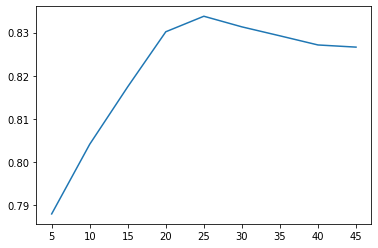

In [159]:
# Depth 25 performs best
plt.plot([5,10,15,20,25,30,35,40,45],
    [np.mean(score5),np.mean(score10),np.mean(score15),np.mean(score20),
     np.mean(score25),np.mean(score30),np.mean(score35),np.mean(score40),np.mean(score45)])

# AdaBoost